In [1]:
# Importing 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path


## 1.Exploratory Data Analysis (EDA)

a. Loading and Previewing the data to understand its structure and key characteristics
b. Summarising the data including mean, median, minimum, maximum and count of missing values if any.
c. Perform Univariate and multivariate analysis to understand distributions and relationships among variables
d. Visualise the distributions of transaction types, amounts and other relevant features.
e. Identify and handle any class imbalances, if applicable

In [2]:
# a. Loading and Previewing the data to understand its structure and key characteristics
csv_path = Path("dataset.csv")
df = pd.read_csv(csv_path)
print(f"\n Shape of the dataset is {df.shape}")
print(f"\nColumns of the dataset is \n{df.columns}")
df.head(5)


 Shape of the dataset is (20501, 15)

Columns of the dataset is 
Index(['Time_step', 'Transaction_Id', 'Sender_Id', 'Sender_Account',
       'Sender_Country', 'Sender_Gender', 'Sender_Sector', 'Sender_lob',
       'Bene_Id', 'Bene_Account', 'Bene_Country', 'Bene_Gender', 'USD_amount',
       'Label', 'Transaction_Type'],
      dtype='object')


,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Gender,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,Bene_Gender,USD_amount,Label,Transaction_Type
0,15/03/2022 10:24,QUICK-PAYMENT-8757,JPMC-CLIENT-8738,ACCOUNT-8753,USA,Male,31927.0,CCB,JPMC-CLIENT-8736,ACCOUNT-8748,United States Of America,Male,687.76,0.0,QUICK-PAYMENT
1,15/03/2022 10:24,QUICK-PAYMENT-8477,JPMC-CLIENT-8458,ACCOUNT-8469,USA,Female,46709.0,CCB,CLIENT-8460,ACCOUNT-8472,Canada,Male,100.40,0.0,QUICK-PAYMENT
2,15/03/2022 10:24,WITHDRAWAL-7635,JPMC-CLIENT-7614,ACCOUNT-7625,USA,Female,29504.0,CCB,NaN,NaN,NaN,Female,646.64,0.0,EXCHANGE
3,15/03/2022 10:24,QUICK-PAYMENT-7065,JPMC-CLIENT-7048,ACCOUNT-7059,USA,Male,10365.0,CCB,CLIENT-7050,ACCOUNT-7063,Canada,NaN,582.67,0.0,QUICK-PAYMENT
4,15/03/2022 10:24,QUICK-DEPOSIT-6991,NaN,NaN,NaN,Female,NaN,NaN,JPMC-CLIENT-6974,ACCOUNT-6985,United States Of America,Female,569.50,0.0,DEPOSIT-CASH


In [3]:
# b. Summarising the data including mean, median, minimum, maximum and count of missing values if any.

#df_summary = df.describe(include='all')
df_summary = df.describe()

df_summary


,Sender_Sector,USD_amount,Label
count,17548.000000,20499.00000,20499.000000
mean,25034.227889,510.97427,0.019123
std,14403.845960,554.64498,0.136960
min,1.000000,0.00000,0.000000
25%,12632.750000,137.93500,0.000000
50%,25113.000000,406.91000,0.000000
75%,37417.000000,729.83500,0.000000
max,49997.000000,19838.58000,1.000000


UNIVARIATE ANALYSIS

1.1 CATEGORICAL VARIABLES ANALYSIS
----------------------------------------

Sender_Country:
Unique values: 228
Value counts:
Sender_Country
USA           13574
GERMANY         996
CANADA          394
GUADELOUPE       46
HAITI            37
JAMAICA          36
CROATIA          33
SAMOA            33
LUXEMBOURG       32
AUSTRIA          31
Name: count, dtype: int64


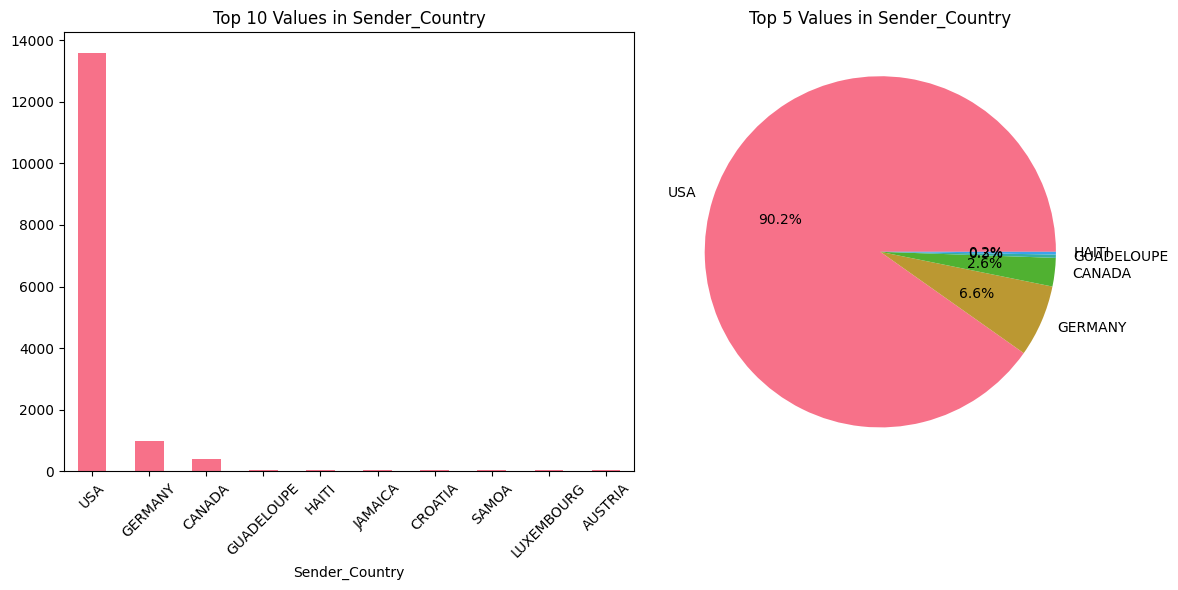


Sender_Gender:
Unique values: 2
Value counts:
Sender_Gender
Male      8392
Female    8223
Name: count, dtype: int64


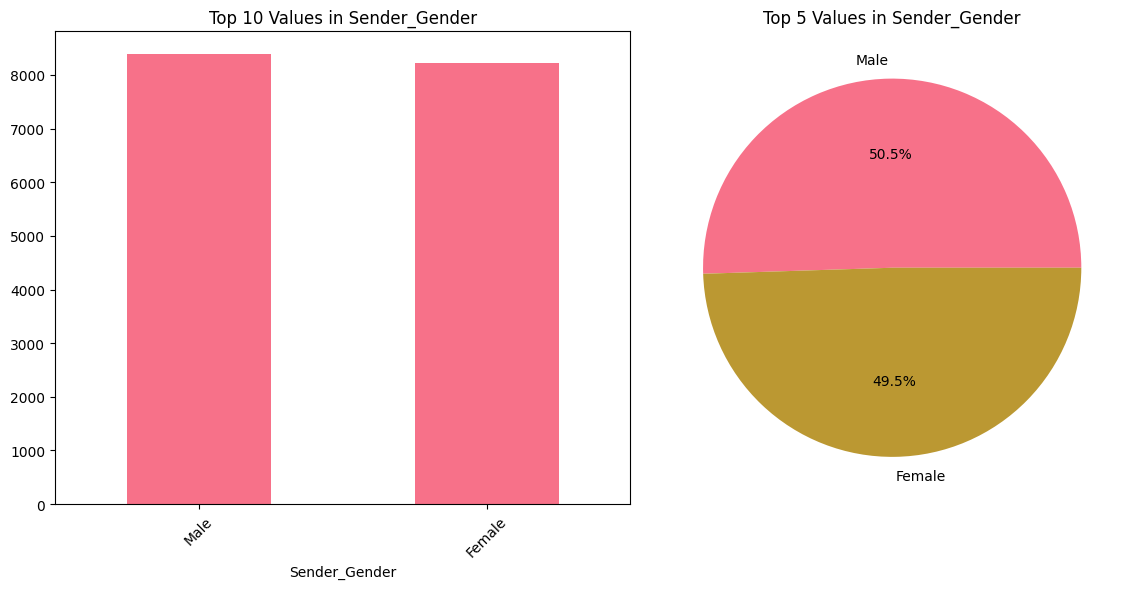


Sender_lob:
Unique values: 1
Value counts:
Sender_lob
CCB    17548
Name: count, dtype: int64


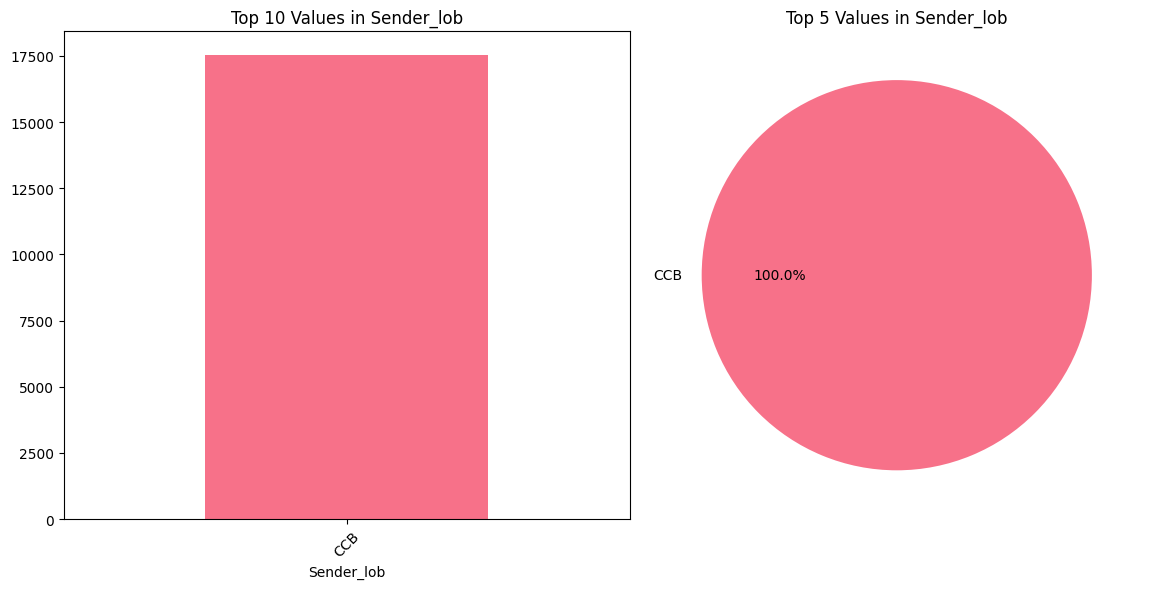


Bene_Country:
Unique values: 252
Value counts:
Bene_Country
United States Of America    10333
Canada                       1762
Germany                       104
Congo-Rep                      54
Jamaica                        52
Uruguay                        52
Slovenia                       51
Gambia                         51
South-Sudan                    49
French-Polynesia               49
Name: count, dtype: int64


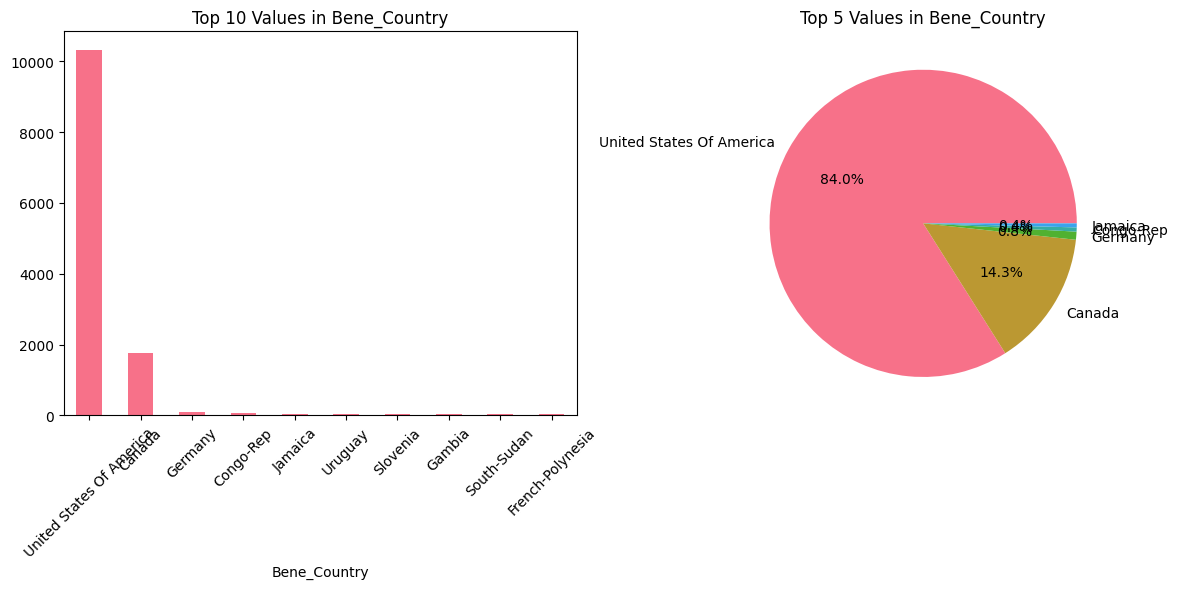


Bene_Gender:
Unique values: 2
Value counts:
Bene_Gender
Male      8311
Female    8303
Name: count, dtype: int64


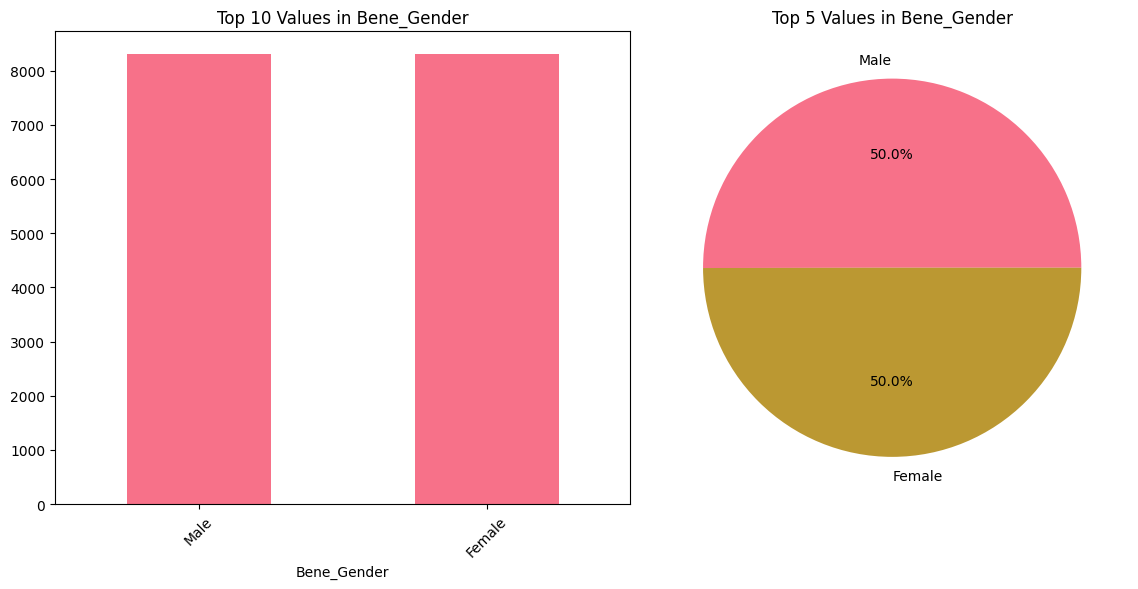


Transaction_Type:
Unique values: 8
Value counts:
Transaction_Type
MAKE-PAYMENT     7598
QUICK-PAYMENT    3162
MOVE-FUNDS       2462
DEPOSIT-CASH     1496
WITHDRAWAL       1487
EXCHANGE         1480
DEPOSIT-CHECK    1455
PAY-CHECK        1359
Name: count, dtype: int64


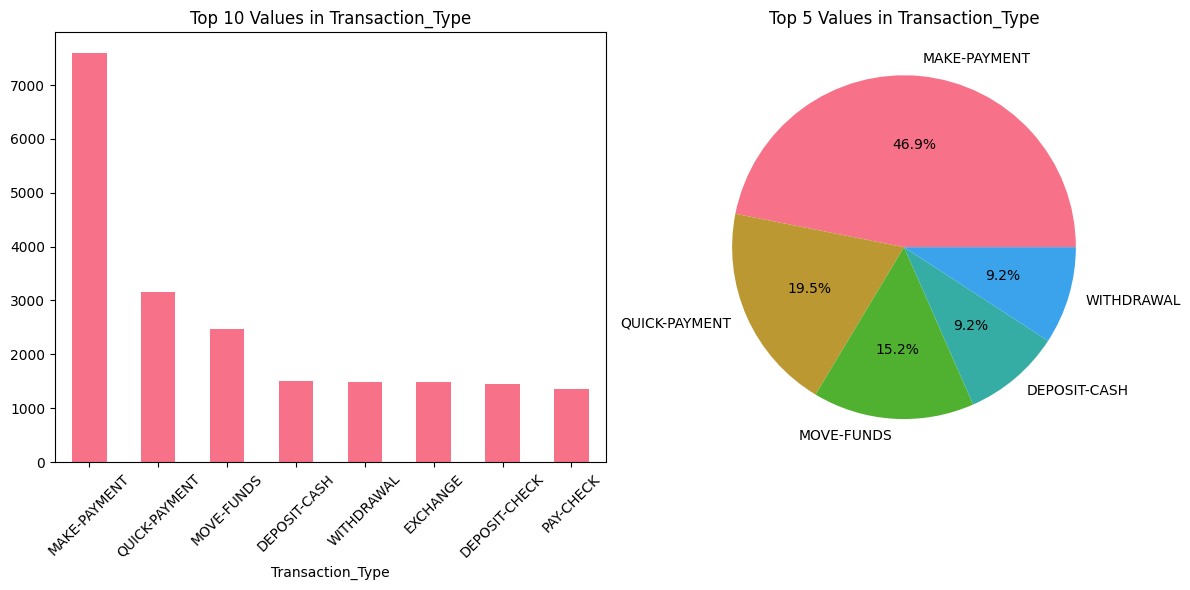


Label:
Unique values: 2
Value counts:
Label
0.0    20107
1.0      392
Name: count, dtype: int64


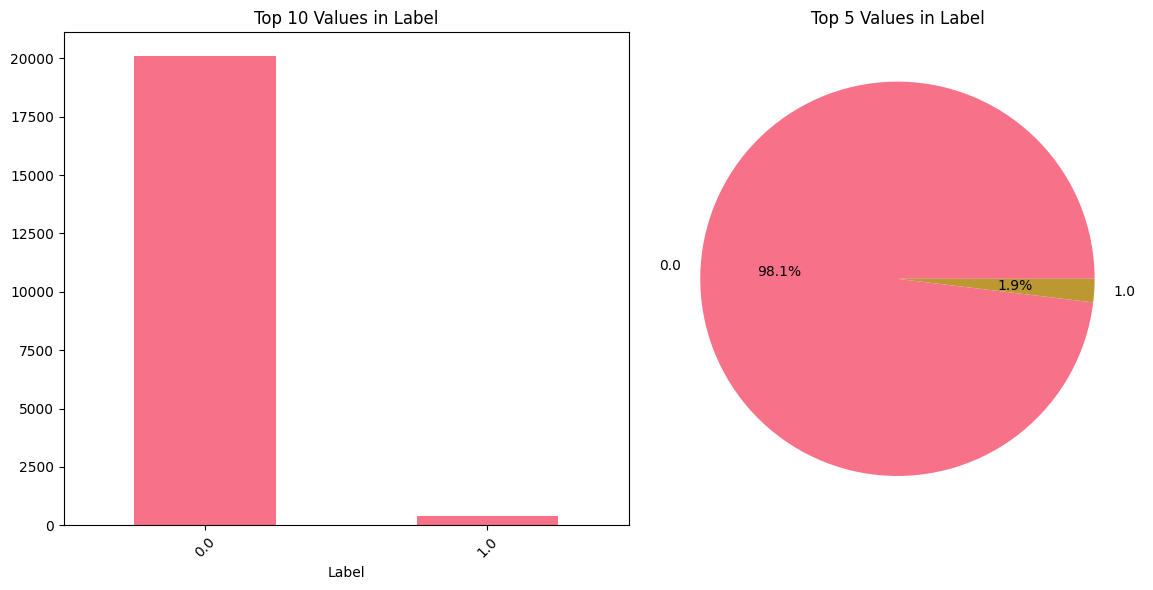


1.2 NUMERIC VARIABLES ANALYSIS
----------------------------------------

Sender_Sector:
Count: 17548
Mean: 25034.23
Median: 25113.00
Std: 14403.85
Min: 1.00
Max: 49997.00
Skewness: -0.01
Kurtosis: -1.19


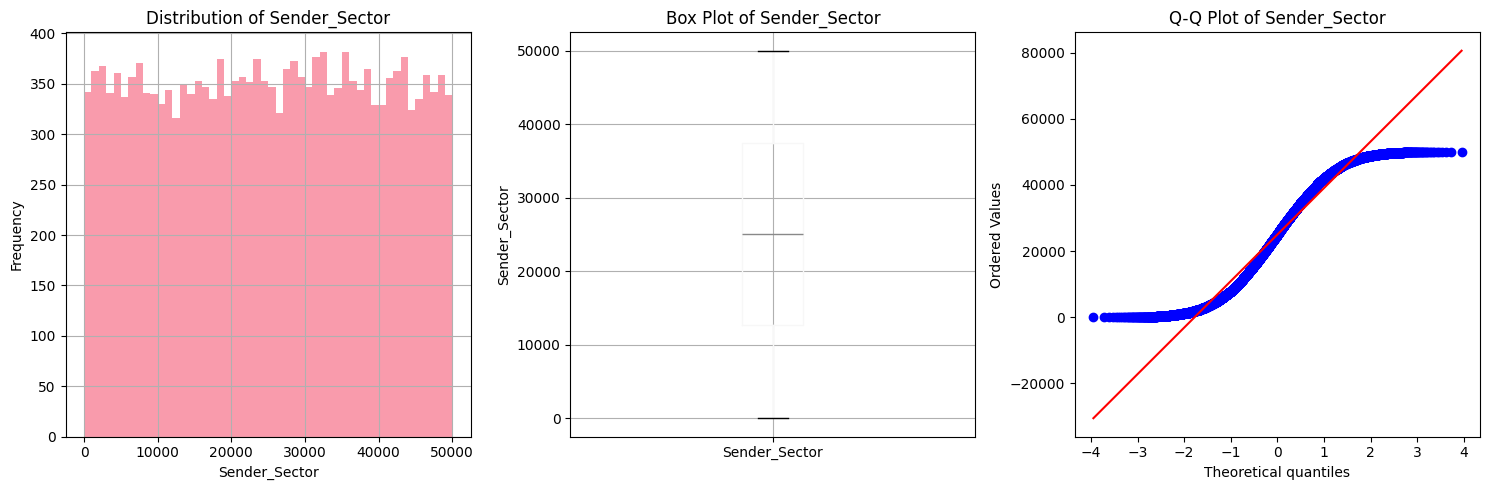


USD_amount:
Count: 20499
Mean: 510.97
Median: 406.91
Std: 554.64
Min: 0.00
Max: 19838.58
Skewness: 11.16
Kurtosis: 314.00


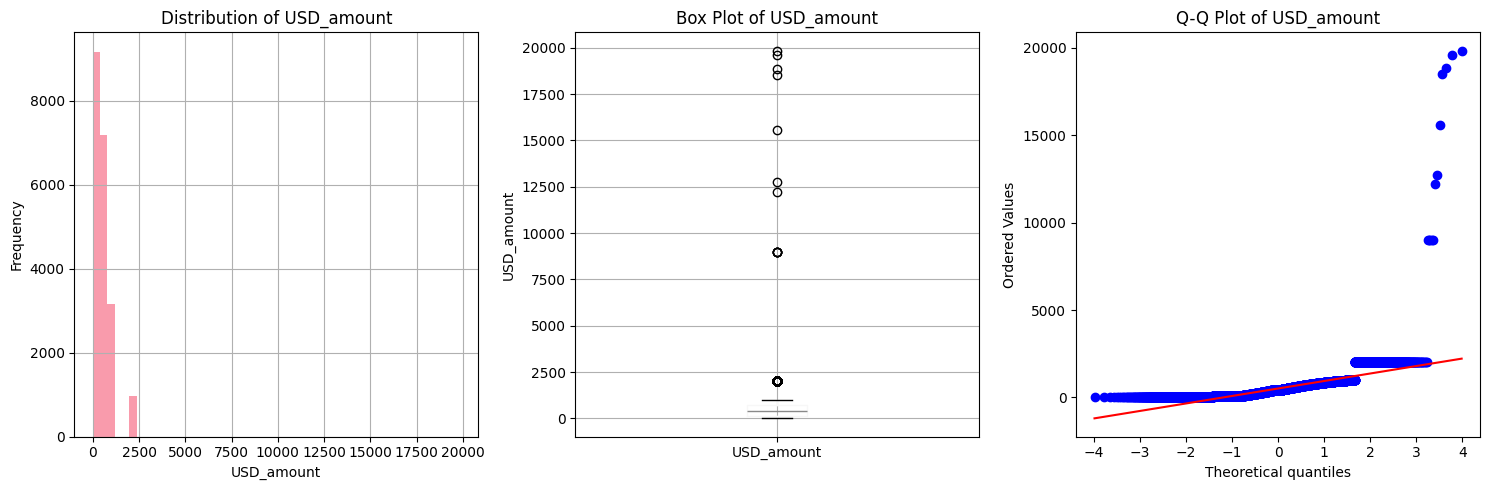


Label:
Count: 20499
Mean: 0.02
Median: 0.00
Std: 0.14
Min: 0.00
Max: 1.00
Skewness: 7.02
Kurtosis: 47.32


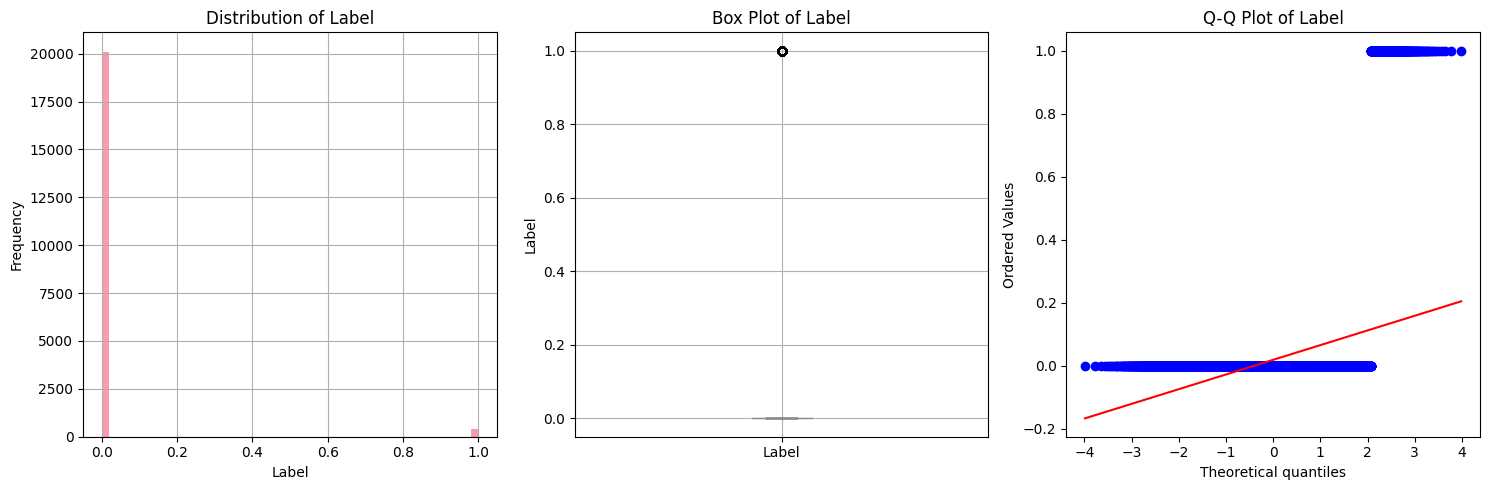


1.3 TIME ANALYSIS
----------------------------------------


ValueError: time data " " doesn't match format "%d/%m/%Y %H:%M", at position 16118. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [4]:
# c. Perform Univariate and multivariate analysis to understand distributions and relationships among variables

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. UNIVARIATE ANALYSIS
print("="*60)
print("UNIVARIATE ANALYSIS")
print("="*60)

# 1.1 Categorical Variables Analysis
print("\n1.1 CATEGORICAL VARIABLES ANALYSIS")
print("-"*40)

categorical_cols = ['Sender_Country', 'Sender_Gender', 'Sender_lob', 'Bene_Country', 
                   'Bene_Gender', 'Transaction_Type', 'Label']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"Unique values: {df[col].nunique()}")
        print(f"Value counts:")
        print(df[col].value_counts().head(10))
        
        # Visualization for categorical variables
        plt.figure(figsize=(12, 6))
        
        # Count plot
        plt.subplot(1, 2, 1)
        value_counts = df[col].value_counts().head(10)
        value_counts.plot(kind='bar')
        plt.title(f'Top 10 Values in {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Pie chart for top 5 values
        plt.subplot(1, 2, 2)
        top_5 = df[col].value_counts().head(5)
        plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')
        plt.title(f'Top 5 Values in {col}')
        
        plt.tight_layout()
        plt.show()

# 1.2 Numeric Variables Analysis
print("\n1.2 NUMERIC VARIABLES ANALYSIS")
print("-"*40)

numeric_cols = ['Sender_Sector', 'USD_amount', 'Label']
numeric_cols = [col for col in numeric_cols if col in df.columns]

for col in numeric_cols:
    print(f"\n{col}:")
    print(f"Count: {df[col].count()}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")
    
    # Visualization for numeric variables
    plt.figure(figsize=(15, 5))
    
    # Histogram
    plt.subplot(1, 3, 1)
    df[col].hist(bins=50, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 3, 2)
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    
    # Q-Q plot for normality check
    plt.subplot(1, 3, 3)
    from scipy import stats
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    
    plt.tight_layout()
    plt.show()

# 1.3 Time Analysis
print("\n1.3 TIME ANALYSIS")
print("-"*40)

# Convert Time_step to datetime
df['Time_step'] = pd.to_datetime(df['Time_step'], format='%d/%m/%Y %H:%M')
df['Hour'] = df['Time_step'].dt.hour
df['Day_of_week'] = df['Time_step'].dt.day_name()
df['Month'] = df['Time_step'].dt.month

print("Time range:", df['Time_step'].min(), "to", df['Time_step'].max())
print("Total days:", (df['Time_step'].max() - df['Time_step'].min()).days)

# Time-based visualizations
plt.figure(figsize=(15, 10))

# Transactions by hour
plt.subplot(2, 2, 1)
df['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')

# Transactions by day of week
plt.subplot(2, 2, 2)
df['Day_of_week'].value_counts().plot(kind='bar')
plt.title('Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Transactions by month
plt.subplot(2, 2, 3)
df['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Time series of transaction amounts
plt.subplot(2, 2, 4)
daily_amounts = df.groupby(df['Time_step'].dt.date)['USD_amount'].sum()
daily_amounts.plot()
plt.title('Daily Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total USD Amount')

plt.tight_layout()
plt.show()


In [ ]:
# 2. MULTIVARIATE ANALYSIS
print("\n" + "="*60)
print("MULTIVARIATE ANALYSIS")
print("="*60)

# 2.1 Correlation Analysis
print("\n2.1 CORRELATION ANALYSIS")
print("-"*40)

# Select numeric columns for correlation
numeric_cols_for_corr = ['Sender_Sector', 'USD_amount', 'Label']
numeric_cols_for_corr = [col for col in numeric_cols_for_corr if col in df.columns]

if len(numeric_cols_for_corr) > 1:
    correlation_matrix = df[numeric_cols_for_corr].corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()

# 2.2 Cross-tabulation Analysis
print("\n2.2 CROSS-TABULATION ANALYSIS")
print("-"*40)

# Fraud vs Transaction Type
if 'Label' in df.columns and 'Transaction_Type' in df.columns:
    print("Fraud Distribution by Transaction Type:")
    fraud_by_type = pd.crosstab(df['Transaction_Type'], df['Label'], margins=True)
    print(fraud_by_type)
    
    # Visualization
    plt.figure(figsize=(15, 6))
    
    # Stacked bar chart
    plt.subplot(1, 2, 1)
    fraud_by_type_pct = pd.crosstab(df['Transaction_Type'], df['Label'], normalize='index') * 100
    fraud_by_type_pct.plot(kind='bar', stacked=True)
    plt.title('Fraud Distribution by Transaction Type (%)')
    plt.xlabel('Transaction Type')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(['Non-Fraud', 'Fraud'])
    
    # Count plot
    plt.subplot(1, 2, 2)
    fraud_by_type_count = pd.crosstab(df['Transaction_Type'], df['Label'])
    fraud_by_type_count.plot(kind='bar')
    plt.title('Fraud Count by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(['Non-Fraud', 'Fraud'])
    
    plt.tight_layout()
    plt.show()

# Fraud vs Sender Country
if 'Label' in df.columns and 'Sender_Country' in df.columns:
    print("\nFraud Distribution by Sender Country (Top 10):")
    fraud_by_country = pd.crosstab(df['Sender_Country'], df['Label'])
    fraud_by_country_pct = fraud_by_country.div(fraud_by_country.sum(axis=1), axis=0) * 100
    fraud_by_country_pct = fraud_by_country_pct.sort_values(1, ascending=False).head(10)
    print(fraud_by_country_pct)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    fraud_by_country_pct.plot(kind='bar', stacked=True)
    plt.title('Fraud Rate by Sender Country (Top 10)')
    plt.xlabel('Sender Country')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(['Non-Fraud', 'Fraud'])
    plt.tight_layout()
    plt.show()

# 2.3 Amount Analysis by Categories
print("\n2.3 AMOUNT ANALYSIS BY CATEGORIES")
print("-"*40)

# Amount distribution by fraud status
if 'Label' in df.columns:
    plt.figure(figsize=(15, 10))
    
    # Box plot of amounts by fraud status
    plt.subplot(2, 2, 1)
    df.boxplot(column='USD_amount', by='Label')
    plt.title('Transaction Amount Distribution by Fraud Status')
    plt.xlabel('Fraud Status (0=No, 1=Yes)')
    plt.ylabel('USD Amount')
    
    # Violin plot
    plt.subplot(2, 2, 2)
    sns.violinplot(x='Label', y='USD_amount', data=df)
    plt.title('Transaction Amount Distribution by Fraud Status (Violin Plot)')
    plt.xlabel('Fraud Status (0=No, 1=Yes)')
    plt.ylabel('USD Amount')
    
    # Amount distribution by transaction type
    plt.subplot(2, 2, 3)
    df.boxplot(column='USD_amount', by='Transaction_Type')
    plt.title('Transaction Amount by Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('USD Amount')
    plt.xticks(rotation=45)
    
    # Amount distribution by sender country (top 5)
    plt.subplot(2, 2, 4)
    top_countries = df['Sender_Country'].value_counts().head(5).index
    df_top_countries = df[df['Sender_Country'].isin(top_countries)]
    sns.boxplot(x='Sender_Country', y='USD_amount', data=df_top_countries)
    plt.title('Transaction Amount by Top 5 Sender Countries')
    plt.xlabel('Sender Country')
    plt.ylabel('USD Amount')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 2.4 Statistical Tests
print("\n2.4 STATISTICAL TESTS")
print("-"*40)

from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

# Chi-square test for categorical variables
if 'Label' in df.columns and 'Transaction_Type' in df.columns:
    contingency_table = pd.crosstab(df['Transaction_Type'], df['Label'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for Transaction_Type vs Label:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Significant at 0.05 level: {'Yes' if p_value < 0.05 else 'No'}")

# T-test for amount differences between fraud and non-fraud
if 'Label' in df.columns:
    fraud_amounts = df[df['Label'] == 1]['USD_amount'].dropna()
    non_fraud_amounts = df[df['Label'] == 0]['USD_amount'].dropna()
    
    if len(fraud_amounts) > 0 and len(non_fraud_amounts) > 0:
        t_stat, t_p_value = ttest_ind(fraud_amounts, non_fraud_amounts)
        u_stat, u_p_value = mannwhitneyu(fraud_amounts, non_fraud_amounts, alternative='two-sided')
        
        print(f"\nT-test for USD_amount differences:")
        print(f"T-statistic: {t_stat:.4f}")
        print(f"P-value: {t_p_value:.4f}")
        print(f"Significant at 0.05 level: {'Yes' if t_p_value < 0.05 else 'No'}")
        
        print(f"\nMann-Whitney U test for USD_amount differences:")
        print(f"U-statistic: {u_stat:.4f}")
        print(f"P-value: {u_p_value:.4f}")
        print(f"Significant at 0.05 level: {'Yes' if u_p_value < 0.05 else 'No'}")
        
        print(f"\nAmount statistics:")
        print(f"Fraud transactions - Mean: {fraud_amounts.mean():.2f}, Median: {fraud_amounts.median():.2f}")
        print(f"Non-fraud transactions - Mean: {non_fraud_amounts.mean():.2f}, Median: {non_fraud_amounts.median():.2f}")

# 2.5 Feature Engineering Insights
print("\n2.5 FEATURE ENGINEERING INSIGHTS")
print("-"*40)

# Create some derived features for analysis
df['Amount_Log'] = np.log1p(df['USD_amount'])  # Log transformation for skewed amounts
df['Is_High_Amount'] = (df['USD_amount'] > df['USD_amount'].quantile(0.95)).astype(int)
df['Is_International'] = (df['Sender_Country'] != df['Bene_Country']).astype(int)

# Analyze high amount transactions
if 'Label' in df.columns:
    high_amount_fraud = df[df['Is_High_Amount'] == 1]['Label'].mean()
    overall_fraud = df['Label'].mean()
    print(f"Fraud rate in high amount transactions (>95th percentile): {high_amount_fraud:.4f}")
    print(f"Overall fraud rate: {overall_fraud:.4f}")
    print(f"High amount transactions are {'more' if high_amount_fraud > overall_fraud else 'less'} likely to be fraudulent")

# International vs domestic transactions
if 'Label' in df.columns:
    intl_fraud = df[df['Is_International'] == 1]['Label'].mean()
    domestic_fraud = df[df['Is_International'] == 0]['Label'].mean()
    print(f"Fraud rate in international transactions: {intl_fraud:.4f}")
    print(f"Fraud rate in domestic transactions: {domestic_fraud:.4f}")
    print(f"International transactions are {'more' if intl_fraud > domestic_fraud else 'less'} likely to be fraudulent")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)


In [ ]:
# 3. COMPREHENSIVE SUMMARY DASHBOARD
print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY DASHBOARD")
print("="*80)

# 3.1 Dataset Overview
print("\n3.1 DATASET OVERVIEW")
print("-"*50)
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Time Period: {df['Time_step'].min().strftime('%Y-%m-%d')} to {df['Time_step'].max().strftime('%Y-%m-%d')}")
print(f"Total Days: {(df['Time_step'].max() - df['Time_step'].min()).days}")

# 3.2 Missing Data Summary
print("\n3.2 MISSING DATA SUMMARY")
print("-"*50)
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_summary[missing_summary['Missing Count'] > 0])

# 3.3 Fraud Analysis Summary
print("\n3.3 FRAUD ANALYSIS SUMMARY")
print("-"*50)
if 'Label' in df.columns:
    fraud_counts = df['Label'].value_counts()
    fraud_rate = df['Label'].mean()
    print(f"Total Fraud Cases: {fraud_counts.get(1, 0):,}")
    print(f"Total Non-Fraud Cases: {fraud_counts.get(0, 0):,}")
    print(f"Fraud Rate: {fraud_rate:.4f} ({fraud_rate*100:.2f}%)")
    print(f"Class Imbalance Ratio: {fraud_counts.get(0, 1) / fraud_counts.get(1, 1):.2f}:1")

# 3.4 Transaction Amount Summary
print("\n3.4 TRANSACTION AMOUNT SUMMARY")
print("-"*50)
print(f"Total Transaction Volume: ${df['USD_amount'].sum():,.2f}")
print(f"Average Transaction Amount: ${df['USD_amount'].mean():.2f}")
print(f"Median Transaction Amount: ${df['USD_amount'].median():.2f}")
print(f"Largest Transaction: ${df['USD_amount'].max():.2f}")
print(f"Smallest Transaction: ${df['USD_amount'].min():.2f}")

# 3.5 Geographic Distribution
print("\n3.5 GEOGRAPHIC DISTRIBUTION")
print("-"*50)
print("Top 5 Sender Countries:")
print(df['Sender_Country'].value_counts().head(5))
print("\nTop 5 Beneficiary Countries:")
print(df['Bene_Country'].value_counts().head(5))

# 3.6 Transaction Type Distribution
print("\n3.6 TRANSACTION TYPE DISTRIBUTION")
print("-"*50)
print("Transaction Types:")
print(df['Transaction_Type'].value_counts())

# 3.7 Key Insights
print("\n3.7 KEY INSIGHTS")
print("-"*50)

insights = []

# Fraud rate insights
if 'Label' in df.columns:
    fraud_rate = df['Label'].mean()
    if fraud_rate < 0.01:
        insights.append(f"• Very low fraud rate ({fraud_rate*100:.2f}%) - highly imbalanced dataset")
    elif fraud_rate < 0.05:
        insights.append(f"• Low fraud rate ({fraud_rate*100:.2f}%) - moderately imbalanced dataset")
    else:
        insights.append(f"• Moderate fraud rate ({fraud_rate*100:.2f}%) - relatively balanced dataset")

# Amount distribution insights
amount_skew = df['USD_amount'].skew()
if amount_skew > 2:
    insights.append(f"• Transaction amounts are highly right-skewed (skewness: {amount_skew:.2f})")
elif amount_skew > 1:
    insights.append(f"• Transaction amounts are moderately right-skewed (skewness: {amount_skew:.2f})")
else:
    insights.append(f"• Transaction amounts are relatively normally distributed (skewness: {amount_skew:.2f})")

# Missing data insights
high_missing_cols = missing_summary[missing_summary['Missing Percentage'] > 20].index.tolist()
if high_missing_cols:
    insights.append(f"• High missing data in: {', '.join(high_missing_cols)}")

# Time pattern insights
if 'Hour' in df.columns:
    peak_hour = df['Hour'].mode().iloc[0]
    insights.append(f"• Peak transaction hour: {peak_hour}:00")

# Transaction type insights
if 'Transaction_Type' in df.columns:
    most_common_type = df['Transaction_Type'].mode().iloc[0]
    type_pct = (df['Transaction_Type'] == most_common_type).mean() * 100
    insights.append(f"• Most common transaction type: {most_common_type} ({type_pct:.1f}%)")

for insight in insights:
    print(insight)

# 3.8 Recommendations for Further Analysis
print("\n3.8 RECOMMENDATIONS FOR FURTHER ANALYSIS")
print("-"*50)
recommendations = [
    "• Handle missing data through imputation or feature engineering",
    "• Address class imbalance using techniques like SMOTE or class weighting",
    "• Consider log transformation for USD_amount due to high skewness",
    "• Create time-based features (hour, day of week, seasonality)",
    "• Engineer features for international vs domestic transactions",
    "• Analyze patterns in high-value transactions",
    "• Consider feature selection based on correlation analysis",
    "• Implement cross-validation strategies appropriate for imbalanced data"
]

for rec in recommendations:
    print(rec)

print("\n" + "="*80)
print("ANALYSIS COMPLETE - READY FOR MODELING")
print("="*80)


In [ ]:
csv_path = Path("dataset.csv")
df = pd.read_csv(csv_path)
print(f"\nShape of the dataset is {df.shape}")
print(f"\nColumns of the dataset is \n{df.columns.tolist()}")
print(f"\nData types of the dataset is \n{df.dtypes}")
print(f"\nSummary statistics of the dataset is \n{df.describe(include='all')}")
print(f"\nMissing values of the dataset is \n{df.isnull().sum()}")
#print(f"\nClass distribution of the dataset is {df['is_fraud'].value_counts()}")




In [ ]:
df.head(5)

In [ ]:
df.columns

In [ ]:
# Loading Dataset

In [ ]:
# Step 2: EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Take Home Task - Fraud Data.csv")

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

# Summary statistics
print("\nSummary stats:\n", df.describe(include='all'))

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Class balance (assuming column 'is_fraud' or similar)
if "is_fraud" in df.columns:
    print("\nClass distribution:\n", df["is_fraud"].value_counts())
    sns.countplot(x="is_fraud", data=df)
    plt.title("Fraud vs Non-Fraud Distribution")
    plt.show()

# Histograms for numeric columns
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots for detecting outliers
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
